In [1]:
import pandas as pd

df = pd.read_csv('speakers.csv')
print(df.head())

   identifier                        birth_place native_language  \
0  afrikaans1             virginia, south africa       afrikaans   
1  afrikaans2             pretoria, south africa       afrikaans   
2  afrikaans3  pretoria, transvaal, south africa       afrikaans   
3  afrikaans4             pretoria, south africa       afrikaans   
4  afrikaans5            cape town, south africa       afrikaans   

          other_languages   age     sex  age_of_english_onset  \
0                  tswana  27.0  female                   9.0   
1     dutch german french  40.0    male                   5.0   
2  gujarati sindhi french  43.0    male                   4.0   
3           flemish dutch  26.0    male                   8.0   
4                    none  19.0    male                   6.0   

  english_learning_method english_residence length_of_english_residence  \
0                academic               usa                   0.5 years   
1                academic               usa       

In [2]:
import mutagen.mp3
directory = 'mp3s'
#just the mp3_name
temp_df = df['mp3_name']

length = []

for mp3 in temp_df:
    audio = mutagen.mp3.MP3(directory + '/' + mp3)
    length.append(audio.info.length)




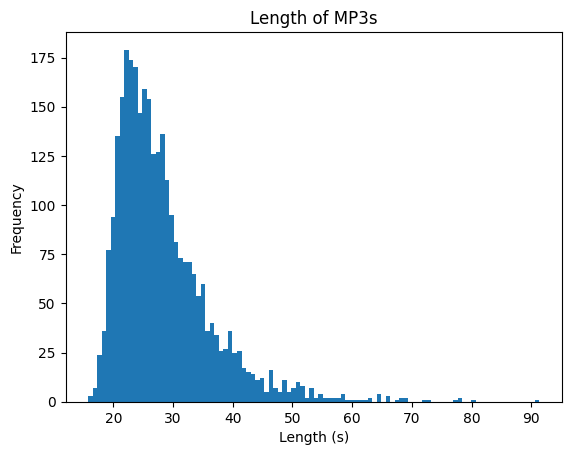

Mean length: 28.36518369653683
Standard deviation: 8.123889886541065


In [3]:
import numpy as np
#print spread of lengths
import matplotlib.pyplot as plt
plt.hist(length, bins=100)
plt.title('Length of MP3s')
plt.xlabel('Length (s)')
plt.ylabel('Frequency')
plt.show()
mean_length = np.mean(length)
std_length = np.std(length)

print("Mean length:", mean_length)
print("Standard deviation:", std_length)



In [4]:
from WER_finder import WERCalculator
SNR = "mp3s" #values are "mp3s", "40_SNR", "30_SNR", "20_SNR", "10_SNR", "0_SNR", "-10_SNR".
folder_path = "base_model_transcription "+SNR
wer_calculator = WERCalculator(folder_path)
werdf=wer_calculator.calculate_wer()
print(werdf)


                 file_name       wer
0          arabic3.mp3.txt  0.130435
1     portuguese23.mp3.txt  0.086957
2         french30.mp3.txt  0.014493
3        arabic138.mp3.txt  0.101449
4        arabic128.mp3.txt  0.130435
...                    ...       ...
3027  indonesian13.mp3.txt  0.043478
3028    spanish241.mp3.txt  0.333333
3029    english502.mp3.txt  0.043478
3030        farsi5.mp3.txt  0.144928
3031     spanish70.mp3.txt  0.159420

[3032 rows x 2 columns]


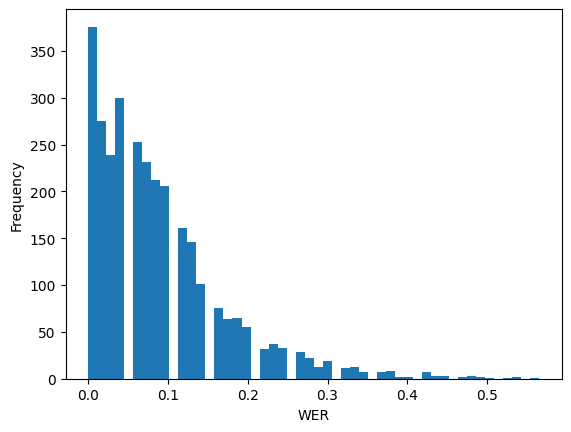

In [34]:

#pop werdf item no 1679
# werdf = werdf.drop([1679])


wer= werdf['wer']
plt.hist(wer, bins=50)

plt.xlabel('WER')
plt.ylabel('Frequency')
plt.show()
#get the index of english449
index = werdf[werdf['file_name'] == 'english449.mp3'].index.values
item = werdf.iloc[index]




In [35]:


#find the index of the highest WER

index = wer.idxmax()
item = werdf.loc[index]
print(item)
werdf = werdf.drop([index])


file_name    portuguese1.mp3.txt
wer                     0.565217
Name: 2919, dtype: object


In [ ]:
ENGLISH449 = " Please call Stella, ask her to bring these things with her from the store. Six spoons of fresh snow peas, five six slabs of blue cheese, and maybe a snack for her brother Bob. We also need a small plastic snake and a big toy frog for the kids. She can scoop these things into three red bags, and we will go meet her Wednesday at the train station."
base =       "Please call Stella.  Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station."
#number of words in base
base_words = base.split()
print("Number of words in base:", len(base_words))
index = werdf[werdf['File'] == "english449.mp3"].index
item = werdf.loc[index]
print(item)
#observed WER = 0.202899



Number of words in base: 69
               File       WER
309  english449.mp3  0.202899


WER as I see it is /69